<a href="https://colab.research.google.com/github/ruben-bgu/big-data-project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Data Retrieval (Use Wikipedia API to get the target page and bidirectional linked pages.)

In [3]:
!pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=5863398d20bf48d61aca82f91ae278be6877c26fd076139cc43ff60610b889d6
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


In [4]:
import wikipediaapi

# Initialize Wikipedia API with a custom user agent
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='WikiAnomalyDetectorUniversityProject/1.0 (Contact: rubenyaa@post.bgu.ac.il)'
)

# Target Wikipedia page
target_page_title = "Israeli Declaration of Independence"

# Get the target page
target_page = wiki_wiki.page(target_page_title)

# Step 1: Extract all linked pages (Outbound Links)
linked_pages = set(target_page.links.keys())
print(f"Total linked pages from {target_page_title}: {len(linked_pages)}")

# Step 2: Extract all backlinks (Inbound Links)
backlinked_pages = set(target_page.backlinks.keys())
print(f"Total pages linking to {target_page_title}: {len(backlinked_pages)}")

# Step 3: Find bidirectional links (Intersection of links and backlinks)
bidirectional_links = linked_pages.intersection(backlinked_pages)
print(f"Bidirectionally linked pages: {len(bidirectional_links)}")

# Display bidirectional links
print("Bidirectional Links:")
for link in list(bidirectional_links)[:20]:
    print(link)


Total linked pages from Israeli Declaration of Independence: 316
Total pages linking to Israeli Declaration of Independence: 940
Bidirectionally linked pages: 122
Bidirectional Links:
Israeli Jews
Borders of Israel
End of the British Mandate for Palestine
History of Israel (1948–present)
History of Jerusalem
Category:History of Israel
1948 Arab–Israeli War
American trusteeship proposal for Palestine
Woodhead Commission
Jewish state
United Nations Partition Plan for Palestine
Green Line (Israel)
The Future of Palestine
Portal:Israel
Constitution of Mandatory Palestine
West Bank
Arab–Israeli conflict
Hasmonean dynasty
List of years in Israel
Anglo-French Declaration


Visualization of the target page and bidirectionally linked pages

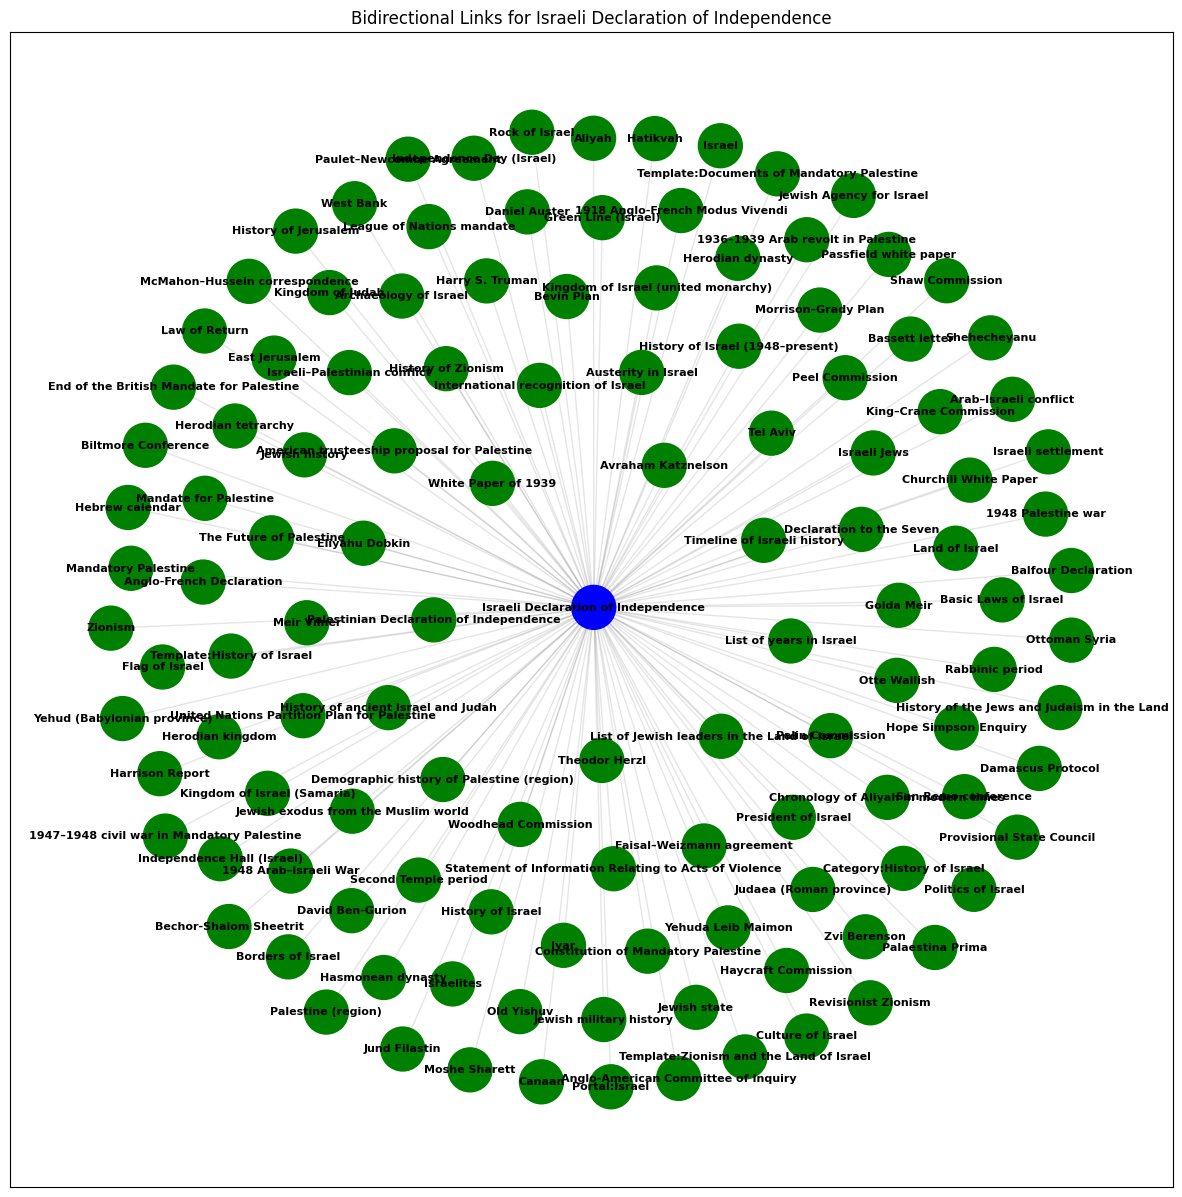

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 4: Create a directed graph using NetworkX
G = nx.DiGraph()

# Add target node in blue
G.add_node(target_page_title, color='blue')

# Add bidirectional linked nodes in green and edges
for link in bidirectional_links:
    G.add_node(link, color='green')
    G.add_edge(target_page_title, link)  # Outbound link
    G.add_edge(link, target_page_title)  # Inbound link

# Get node colors for visualization
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Step 5: Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5, seed=42)  # Layout for visualization

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=1, alpha=0.05)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Title and display
plt.title("Bidirectional Links for Israeli Declaration of Independence")
plt.show()


Store the raw pages text in a folder

In [6]:
import os

# Step 1: Create folder to store raw texts
output_folder = 'raw_pages_texts'
os.makedirs(output_folder, exist_ok=True)

# Function to save page content as a text file
def save_page_content(page_title, page_content, folder):
    # Sanitize file name by replacing illegal characters with underscores
    sanitized_title = page_title.replace("/", "_").replace("\\", "_")
    file_path = os.path.join(folder, f"{sanitized_title}.txt")
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(page_content)
    print(f"Saved: {file_path}")

# Step 2: Save target page content
print("Saving target page content...")
save_page_content(target_page_title, target_page.text, output_folder)

# Step 3: Save bidirectional linked pages content
print("Saving bidirectional linked pages content...")
for link_title in bidirectional_links:
    page = wiki_wiki.page(link_title)
    if page.exists():
        save_page_content(link_title, page.text, output_folder)
    else:
        print(f"Page does not exist: {link_title}")

print("All pages have been saved successfully.")


Saving target page content...
Saved: raw_pages_texts/Israeli Declaration of Independence.txt
Saving bidirectional linked pages content...
Saved: raw_pages_texts/Israeli Jews.txt
Saved: raw_pages_texts/Borders of Israel.txt
Saved: raw_pages_texts/End of the British Mandate for Palestine.txt
Saved: raw_pages_texts/History of Israel (1948–present).txt
Saved: raw_pages_texts/History of Jerusalem.txt
Saved: raw_pages_texts/Category:History of Israel.txt
Saved: raw_pages_texts/1948 Arab–Israeli War.txt
Saved: raw_pages_texts/American trusteeship proposal for Palestine.txt
Saved: raw_pages_texts/Woodhead Commission.txt
Saved: raw_pages_texts/Jewish state.txt
Saved: raw_pages_texts/United Nations Partition Plan for Palestine.txt
Saved: raw_pages_texts/Green Line (Israel).txt
Saved: raw_pages_texts/The Future of Palestine.txt
Saved: raw_pages_texts/Portal:Israel.txt
Saved: raw_pages_texts/Constitution of Mandatory Palestine.txt
Saved: raw_pages_texts/West Bank.txt
Saved: raw_pages_texts/Arab–Is

In [8]:
!pip install dotenv langchain_openai langchain_community tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00


In [10]:
import os
from dotenv import load_dotenv
from tqdm import tqdm
import tiktoken

# LangChain and FAISS imports
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores.faiss import FAISS
from langchain_core.documents.base import Document

# Step 1: Load the .env file and retrieve the OpenAI API key
load_dotenv()
api_key = "OPENAI-API-KEY"

# Directory containing the raw text files
input_folder = 'raw_pages_texts'

# Parameters for chunking
MAX_TOKENS = 200  # Target tokens per chunk
OVERLAP = 40     # Overlap between chunks to preserve context

# Initialize the tokenizer for OpenAI models
encoding = tiktoken.get_encoding("cl100k_base")

# Function to chunk text using tiktoken
def chunk_text(text, max_tokens=MAX_TOKENS, overlap=OVERLAP):
    tokens = encoding.encode(text)
    chunks = []

    # Split tokens into chunks with overlap
    for i in range(0, len(tokens), max_tokens - overlap):
        chunk = tokens[i:i + max_tokens]
        chunk_text = encoding.decode(chunk)
        chunks.append(chunk_text)

    return chunks

# Initialize OpenAI Embeddings from LangChain
embeddings = OpenAIEmbeddings(openai_api_key=api_key)

STEP 2: Embedding Generation (Generate embeddings for all pages using OpenAI Embedding.)

In [12]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 54.6 MB/s eta 0:00:00


In [13]:
# Step 2: Create LangChain Documents and Store in FAISS
docs = []

# Process each text file
for filename in tqdm(os.listdir(input_folder), desc="Processing files"):
    if filename.endswith(".txt") and target_page_title not in filename:
        filepath = os.path.join(input_folder, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()

        # Step 3: Chunk the text using tiktoken
        chunks = chunk_text(text)
        print(f"{filename}: {len(chunks)} chunks created.")

        # Step 4: Create LangChain Documents
        for idx, chunk in enumerate(chunks):
            # Metadata for each chunk
            metadata = {
                "filename": filename,
                "chunk_index": idx
            }
            docs.append(Document(page_content=chunk, metadata=metadata))

# Step 5: Create FAISS Index
db = FAISS.from_documents(docs, embeddings)

# Step 6: Save the FAISS Index Locally
db.save_local('faiss_db', index_name='wikipedia_index')

print("FAISS index saved successfully.")


Processing files:  19%|█▊        | 23/123 [00:00<00:00, 109.09it/s]

Jewish exodus from the Muslim world.txt: 121 chunks created.
Kingdom of Israel (Samaria).txt: 24 chunks created.
Culture of Israel.txt: 63 chunks created.
Moshe Sharett.txt: 23 chunks created.
League of Nations mandate.txt: 17 chunks created.
History of Israel (1948–present).txt: 101 chunks created.
Basic Laws of Israel.txt: 20 chunks created.
Politics of Israel.txt: 20 chunks created.
Bassett letter.txt: 5 chunks created.
Hebrew calendar.txt: 89 chunks created.
Template:Zionism and the Land of Israel.txt: 1 chunks created.
Aliyah.txt: 76 chunks created.
Meir Vilner.txt: 7 chunks created.
Zvi Berenson.txt: 4 chunks created.
Borders of Israel.txt: 43 chunks created.
David Ben-Gurion.txt: 80 chunks created.
King–Crane Commission.txt: 23 chunks created.
Independence Hall (Israel).txt: 8 chunks created.
Portal:Israel.txt: 1 chunks created.
Golda Meir.txt: 61 chunks created.
Provisional State Council.txt: 3 chunks created.
Arab–Israeli conflict.txt: 60 chunks created.
Constitution of Mandat

Processing files:  28%|██▊       | 35/123 [00:00<00:01, 54.63it/s] 

United Nations Partition Plan for Palestine.txt: 60 chunks created.
Avraham Katznelson.txt: 6 chunks created.
East Jerusalem.txt: 68 chunks created.
Ottoman Syria.txt: 14 chunks created.
Otte Wallish.txt: 17 chunks created.
Rock of Israel.txt: 5 chunks created.
1948 Arab–Israeli War.txt: 142 chunks created.
Haycraft Commission.txt: 12 chunks created.
Balfour Declaration.txt: 103 chunks created.
Harry S. Truman.txt: 162 chunks created.


Processing files:  40%|███▉      | 49/123 [00:01<00:01, 38.78it/s]

Israeli settlement.txt: 116 chunks created.
West Bank.txt: 84 chunks created.
Category:History of Israel.txt: 1 chunks created.
Palestinian Declaration of Independence.txt: 11 chunks created.
Judaea (Roman province).txt: 36 chunks created.
Passfield white paper.txt: 5 chunks created.
Mandate for Palestine.txt: 103 chunks created.
Faisal–Weizmann agreement.txt: 29 chunks created.
Jewish state.txt: 16 chunks created.
Flag of Israel.txt: 20 chunks created.
American trusteeship proposal for Palestine.txt: 5 chunks created.


Processing files:  45%|████▍     | 55/123 [00:01<00:01, 41.48it/s]

Second Temple period.txt: 95 chunks created.
Old Yishuv.txt: 28 chunks created.
Statement of Information Relating to Acts of Violence.txt: 1 chunks created.
Israeli Jews.txt: 93 chunks created.
History of the Jews and Judaism in the Land of Israel.txt: 101 chunks created.
Demographic history of Palestine (region).txt: 65 chunks created.
Herodian tetrarchy.txt: 11 chunks created.


Processing files:  55%|█████▌    | 68/123 [00:01<00:01, 38.50it/s]

History of Israel.txt: 170 chunks created.
Jund Filastin.txt: 33 chunks created.
San Remo conference.txt: 17 chunks created.
Theodor Herzl.txt: 68 chunks created.
Template:Documents of Mandatory Palestine.txt: 0 chunks created.
Template:History of Israel.txt: 1 chunks created.
1948 Palestine war.txt: 57 chunks created.
Iyar.txt: 16 chunks created.
Anglo-American Committee of Inquiry.txt: 19 chunks created.
Revisionist Zionism.txt: 50 chunks created.
Herodian dynasty.txt: 18 chunks created.
Bechor-Shalom Sheetrit.txt: 5 chunks created.
List of years in Israel.txt: 1 chunks created.
Anglo-French Declaration.txt: 6 chunks created.
Declaration to the Seven.txt: 3 chunks created.


Processing files:  66%|██████▌   | 81/123 [00:01<00:01, 38.66it/s]

History of ancient Israel and Judah.txt: 45 chunks created.
Tel Aviv.txt: 100 chunks created.
Kingdom of Israel (united monarchy).txt: 27 chunks created.
History of Jerusalem.txt: 82 chunks created.
Hatikvah.txt: 18 chunks created.
Jewish Agency for Israel.txt: 66 chunks created.
Jewish military history.txt: 55 chunks created.


Processing files:  70%|██████▉   | 86/123 [00:02<00:01, 35.75it/s]

Hope Simpson Enquiry.txt: 8 chunks created.
List of Jewish leaders in the Land of Israel.txt: 27 chunks created.
Rabbinic period.txt: 18 chunks created.
Zionism.txt: 115 chunks created.
Green Line (Israel).txt: 22 chunks created.


Processing files:  78%|███████▊  | 96/123 [00:02<00:00, 37.73it/s]

Jewish history.txt: 124 chunks created.
The Future of Palestine.txt: 14 chunks created.
Austerity in Israel.txt: 6 chunks created.
International recognition of Israel.txt: 13 chunks created.
Peel Commission.txt: 29 chunks created.
Morrison–Grady Plan.txt: 11 chunks created.
1918 Anglo-French Modus Vivendi.txt: 5 chunks created.
President of Israel.txt: 17 chunks created.
Land of Israel.txt: 47 chunks created.
Harrison Report.txt: 13 chunks created.
Eliyahu Dobkin.txt: 4 chunks created.
Daniel Auster.txt: 3 chunks created.
Shehecheyanu.txt: 5 chunks created.
White Paper of 1939.txt: 30 chunks created.


Processing files:  85%|████████▍ | 104/123 [00:02<00:00, 46.56it/s]

Israelites.txt: 42 chunks created.
Chronology of Aliyah in modern times.txt: 3 chunks created.
Law of Return.txt: 24 chunks created.
Woodhead Commission.txt: 16 chunks created.
Shaw Commission.txt: 16 chunks created.
Yehud (Babylonian province).txt: 7 chunks created.
Palestine (region).txt: 46 chunks created.
History of Zionism.txt: 127 chunks created.


Processing files:  93%|█████████▎| 115/123 [00:02<00:00, 31.36it/s]

Israel.txt: 125 chunks created.
Herodian kingdom.txt: 12 chunks created.
Canaan.txt: 91 chunks created.
Yehuda Leib Maimon.txt: 5 chunks created.
Timeline of Israeli history.txt: 2 chunks created.
1947–1948 civil war in Mandatory Palestine.txt: 103 chunks created.
End of the British Mandate for Palestine.txt: 10 chunks created.


Processing files:  98%|█████████▊| 120/123 [00:03<00:00, 31.64it/s]

Damascus Protocol.txt: 9 chunks created.
Bevin Plan.txt: 3 chunks created.
Hasmonean dynasty.txt: 77 chunks created.
Paulet–Newcombe Agreement.txt: 9 chunks created.
Archaeology of Israel.txt: 80 chunks created.


Processing files: 100%|██████████| 123/123 [00:03<00:00, 37.93it/s]


1936–1939 Arab revolt in Palestine.txt: 104 chunks created.
Churchill White Paper.txt: 22 chunks created.
Palin Commission.txt: 9 chunks created.
FAISS index saved successfully.


In [14]:
from langchain_community.vectorstores.faiss import FAISS

# Load the FAISS Index
db = FAISS.load_local('faiss_db', index_name='wikipedia_index', embeddings=embeddings, allow_dangerous_deserialization=True)

# Perform Similarity Search
query = "the Israeli Declaration of Independence was signed in November 1957"
similar_content = db.similarity_search(query=query, k=10)

# Display Similar Content
for i, doc in enumerate(similar_content):
    print(f"\nResult {i+1}:\n", doc.page_content)
    print("Metadata:", doc.metadata)



Result 1:
 , and soon to be first Prime Minister of Israel. The event is celebrated annually in Israel as Independence Day, a national holiday on 5 Iyar of every year according to the Hebrew calendar. After the Declaration, Minhelet HaAm became the Provisional government of Israel, whilst Moetzet HaAm became the Provisional State Council.
Paragraph 13 of the Declaration provides that the State of Israel would be based on freedom, justice and peace as envisaged by the prophets of Israel; it will ensure complete equality of social and political rights to all its inhabitants irrespective of religion, race or sex. However, the Knesset maintains that the declaration is neither a law nor an ordinary legal document. The Supreme Court has ruled that the guarantees were merely guiding principles, and that the declaration is not a constitutional law making a practical ruling on the upholding or nullification of various ordinances and statutes.

The Arab–Israeli War
Immediately following the dec

STEP 3: Find contradictions in the target page

In [15]:
from jinja2 import Template

error_detection_prompt = Template(
"""You are an AI specialized in identifying errors in event dates within a given TEXT.
Your task is to verify the accuracy of event dates by comparing them against the KNOWLEDGE BASE.

### **TEXT:**
"{{target_chunk}}"

### **KNOWLEDGE BASE:**
"{{similar_chunk}}"

### **Instructions:**
- Consider the KNOWLEDGE BASE as the ground truth.
- If the TEXT contains an event with a date that contradicts the KNOWLEDGE BASE, list each incorrect date and provide the corrected version.
- If the TEXT is fully consistent with the KNOWLEDGE BASE or if no matching event is found, return an empty string: `''`.
- You must only use information from the KNOWLEDGE BASE—external knowledge is not allowed.

### **Response Format:**
Your answer must be a **list**, where each element follows this exact structure:
[
  "incorrect_date -> corrected_date",
  "another_incorrect_date -> another_corrected_date"
]
Your answer must not contain any header or meta text.
"""
)

error_insertion_prompt = Template(
    """You are an AI agent specialized in introducing errors into a given text, specifically by modifying event dates.

Modify the following text by inserting errors into the event dates while keeping the rest of the content unchanged:

"{{target_chunk}}"

Your response must be a JSON dictionary in the exact format below:

{
  "text_with_errors": "Replace this with the modified text containing the inserted errors.",
  "inserted_errors": [
    {"original": "original_text", "error": "inserted_error"},
    {"original": "another_original_text", "error": "another_inserted_error"}
  ]
}

**Rules:**
- Modify only event dates, keeping all other content unchanged.
- Do not introduce new events or alter factual information beyond date modifications.
- Ensure the inserted errors are plausible.
- Your response must contain **only** the JSON dictionary—no additional text, explanations, or headers.
"""
)

In [16]:
from langchain_openai import ChatOpenAI
import json

def check_contradictions(target_chunk, similar_chunk, llm):
    prompt = error_detection_prompt.render(target_chunk=target_chunk, similar_chunk=similar_chunk)
    response = llm.predict(prompt)
    return response


def insert_errors(target_chunk, llm):
    prompt = error_insertion_prompt.render(target_chunk=target_chunk)
    response = llm.predict(prompt)
    response = json.loads(response)
    return response["text_with_errors"], response["inserted_errors"]


def run_error_detector_pipeline(target_page_title: str):
    # Directory containing the target page text
    target_file = f'raw_pages_texts/{target_page_title}.txt'
    # Load the FAISS index
    db = FAISS.load_local('faiss_db', index_name='wikipedia_index', embeddings=embeddings, allow_dangerous_deserialization=True)

    # Load the target page and chunk it
    with open(target_file, 'r', encoding='utf-8') as f:
        target_text = f.read()

    target_chunks = chunk_text(target_text)

    # Initialize GPT-4o-mini
    llm = ChatOpenAI(model_name="gpt-4o-mini", openai_api_key=api_key)
    results = []
    # Step 4: Compare Each Target Chunk with the 20 Most Similar Chunks
    for idx, target_chunk in enumerate(tqdm(target_chunks, desc="Processing Target Chunks")):
        print(f"{idx + 1}/{len(target_chunks)}")
        try:
            # Get the 20 most similar chunks from the indexed documents
            result = {}
            result["original text"] = target_chunk
            target_chunk_containing_error, inserted_errors = insert_errors(target_chunk, llm)

            if not inserted_errors:
                continue
            result["inserted_errors"] = inserted_errors
            similar_chunks = db.similarity_search(query=target_chunk_containing_error, k=20)
            knowledge_base = " ".join([similar.page_content for similar in similar_chunks])

            # Check for contradictions using GPT-4o-mini
            detected_errors = check_contradictions(target_chunk_containing_error, knowledge_base, llm)
            result["detected_errors"] = json.loads(detected_errors)
            results.append(result)
        except:
            continue

    return results




In [17]:
results = run_error_detector_pipeline(target_page_title)

Processing Target Chunks:   0%|          | 0/29 [00:00<?, ?it/s]<ipython-input-16-7714f91de232>:12: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm.predict(prompt)


1/29


Processing Target Chunks:   3%|▎         | 1/29 [00:04<01:52,  4.02s/it]

2/29


Processing Target Chunks:   7%|▋         | 2/29 [00:08<01:50,  4.11s/it]

3/29


Processing Target Chunks:  10%|█         | 3/29 [00:12<01:51,  4.27s/it]

4/29


Processing Target Chunks:  14%|█▍        | 4/29 [00:16<01:38,  3.93s/it]

5/29


Processing Target Chunks:  17%|█▋        | 5/29 [00:20<01:35,  3.99s/it]

6/29


Processing Target Chunks:  21%|██        | 6/29 [00:23<01:25,  3.73s/it]

7/29


Processing Target Chunks:  24%|██▍       | 7/29 [00:27<01:23,  3.81s/it]

8/29


Processing Target Chunks:  28%|██▊       | 8/29 [00:37<02:01,  5.80s/it]

9/29


Processing Target Chunks:  31%|███       | 9/29 [00:41<01:45,  5.25s/it]

10/29


Processing Target Chunks:  34%|███▍      | 10/29 [00:45<01:29,  4.73s/it]

11/29


Processing Target Chunks:  38%|███▊      | 11/29 [01:50<07:02, 23.47s/it]

12/29


Processing Target Chunks:  41%|████▏     | 12/29 [01:54<04:54, 17.32s/it]

13/29


Processing Target Chunks:  45%|████▍     | 13/29 [01:57<03:31, 13.21s/it]

14/29


Processing Target Chunks:  48%|████▊     | 14/29 [02:08<03:07, 12.52s/it]

15/29


Processing Target Chunks:  52%|█████▏    | 15/29 [02:15<02:28, 10.60s/it]

16/29


Processing Target Chunks:  55%|█████▌    | 16/29 [02:19<01:53,  8.74s/it]

17/29


Processing Target Chunks:  59%|█████▊    | 17/29 [02:24<01:31,  7.62s/it]

18/29


Processing Target Chunks:  62%|██████▏   | 18/29 [02:30<01:19,  7.27s/it]

19/29


Processing Target Chunks:  66%|██████▌   | 19/29 [02:37<01:10,  7.01s/it]

20/29


Processing Target Chunks:  69%|██████▉   | 20/29 [02:42<00:58,  6.48s/it]

21/29


Processing Target Chunks:  72%|███████▏  | 21/29 [02:48<00:49,  6.16s/it]

22/29


Processing Target Chunks:  76%|███████▌  | 22/29 [03:03<01:03,  9.03s/it]

23/29


Processing Target Chunks:  79%|███████▉  | 23/29 [03:14<00:58,  9.69s/it]

24/29


Processing Target Chunks:  83%|████████▎ | 24/29 [03:21<00:43,  8.67s/it]

25/29


Processing Target Chunks:  86%|████████▌ | 25/29 [03:26<00:30,  7.53s/it]

26/29


Processing Target Chunks:  90%|████████▉ | 26/29 [03:30<00:19,  6.55s/it]

27/29


Processing Target Chunks:  93%|█████████▎| 27/29 [03:35<00:12,  6.21s/it]

28/29


Processing Target Chunks:  97%|█████████▋| 28/29 [03:44<00:06,  6.91s/it]

29/29


Processing Target Chunks: 100%|██████████| 29/29 [03:46<00:00,  7.83s/it]


In [18]:
import pandas as pd

df = pd.DataFrame(results)
df

,original text,inserted_errors,detected_errors
0,This page is subject to the extended confirmed...,"[{'original': '14 May 1948', 'error': '14 May ...",[14 May 1947 -> 14 May 1948]
1,come into effect on termination of the Britis...,"[{'original': '5 Iyar', 'error': '6 Iyar'}, {'...",[6 Iyar -> 5 Iyar]
2,and political status enjoyed by Jews in any o...,"[{'original': '1937', 'error': '1936'}, {'orig...","[1937–39 -> 1936–1939, 29 November 1947 -> Nov..."
3,the Special International Regime for the City...,"[{'original': '29 November 1947', 'error': '29...",[29 November 1944 -> 29 November 1947]
4,): PART I: Future constitution and government ...,"[{'original': '1 October 1948', 'error': '1 Ja...","[1 January 1949 -> 1 October 1948, 1 August 19..."
5,"Court, at the request of Pinchas Rosen. A rev...","[{'original': '12 May 1948', 'error': '15 May ...",[15 May 1947 -> 14 May 1948]
6,", with Yehuda Leib Maimon and Yitzhak Gruenbau...","[{'original': 'The meeting started at 13:45', ...","[14 May 1948 at 13:45 -> 14 May 1948 at 13:50,..."
7,); Pinchas Rosen (New Aliyah Party); Bechor-Sh...,"[{'original': '14 May', 'error': '14 June'}]",[14 June -> 14 May]
8,Borders\nThe borders were not specified in the...,"[{'original': 'the UN Resolution', 'error': 't...",[1 August 1948 -> 1 October 1948]
9,the text was dropped after the provisional go...,"[{'original': '5–4', 'error': '6–3'}, {'origin...",[]


In [19]:
df.to_csv("results.csv")